In [1]:
import pandas as pd

fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=['date'])

In [2]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 5 columns):
open      251 non-null float64
high      251 non-null float64
low       251 non-null float64
close     251 non-null float64
volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [3]:
fb.assign(
    rolling_close = lambda x: x.close.rolling('20D').min()
).plot(
    y="rolling_close",
    figsize=(10,5)
)

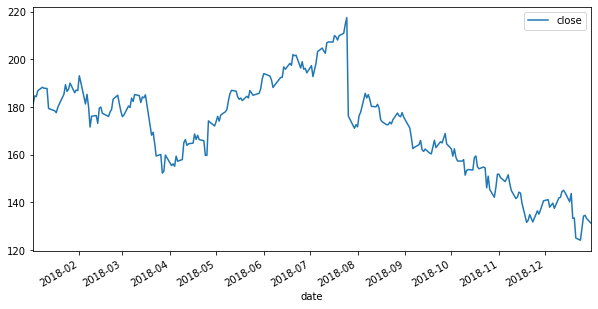

In [4]:
fb.plot(
    y="close",
    figsize=(10,5)
)

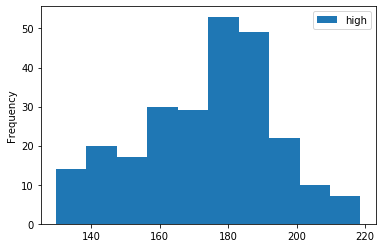

In [5]:
fb.plot(
    y='high',
    kind='hist'
)

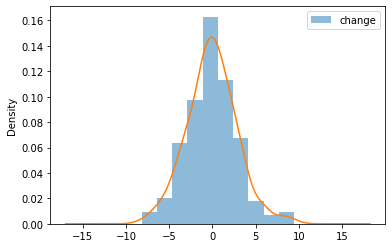

In [6]:
ax = fb.assign(
    change = lambda x: x.open - x.close
).plot(kind='hist',
        y='change',
      density=True,
      alpha = 0.5)

(fb.open - fb.close).plot(
    ax=ax, kind='kde'
)

In [7]:
qu = pd.read_csv('data/earthquakes.csv')

In [8]:
qu.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [9]:
qu.query("parsed_place =='Indonesia'").loc[:,['magType','mag']]

,magType,mag
9,mb,4.7
13,mb,4.5
180,mww,5.2
421,mb,4.7
660,mb,4.4
757,mww,5.6
846,mb,4.3
862,mww,6.0
877,mb,4.9
1052,mb,4.6


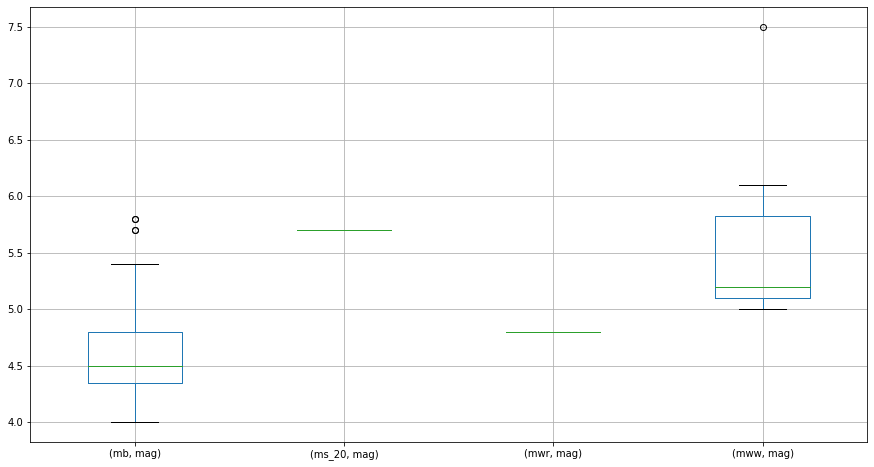

In [10]:
qu.loc[(qu.parsed_place == 'Indonesia'), ['magType', 'mag']].groupby('magType').boxplot(figsize=(15,8), subplots=False)

In [11]:
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [12]:
dif= fb.resample('7D').max()
 

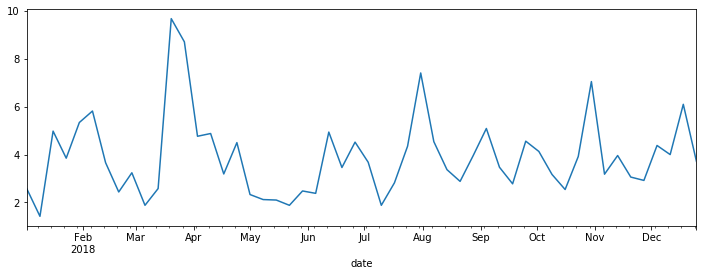

In [13]:
(dif.high - dif.low).plot(figsize=(12,4))

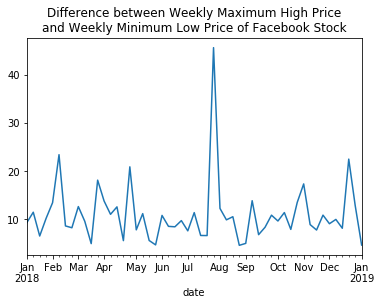

In [14]:
fb.resample('1W').agg(
    dict(high='max', low='min')
).assign(
    max_change_weekly=lambda x: x.high - x.low
).max_change_weekly.plot(
    title='Difference between Weekly Maximum High Price\nand Weekly Minimum Low Price of Facebook Stock'
)

In [15]:
fb.assign(
    prior_close = lambda x: x.close.shift(),
    after_hours = lambda x: x.open - x.prior_close,
    abs_change = lambda x: x.after_hours.abs()
).head()

,open,high,low,close,volume,prior_close,after_hours,abs_change
date,,,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,NaN,NaN,NaN
2018-01-03,181.88,184.78,181.3300,184.67,16886563,181.42,0.46,0.46
2018-01-04,184.90,186.21,184.0996,184.33,13880896,184.67,0.23,0.23
2018-01-05,185.59,186.90,184.9300,186.85,13574535,184.33,1.26,1.26
2018-01-08,187.20,188.90,186.3300,188.28,17994726,186.85,0.35,0.35


In [16]:
daily_change = fb.assign(after_hours = lambda x: x.open - x.close.shift()).after_hours

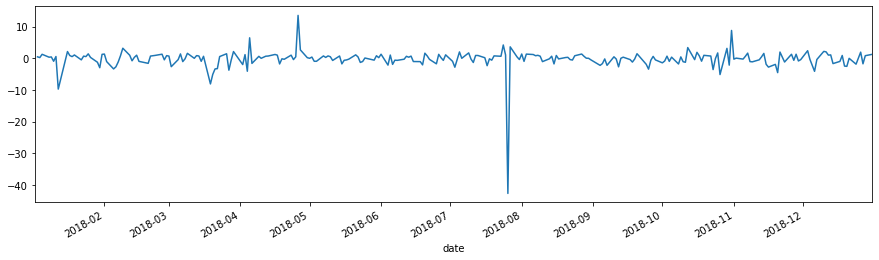

In [17]:
daily_change.plot(figsize=(15,4))

In [18]:
net = daily_change.resample('1M').sum()

In [19]:
import matplotlib.pyplot as plt
import numpy as np

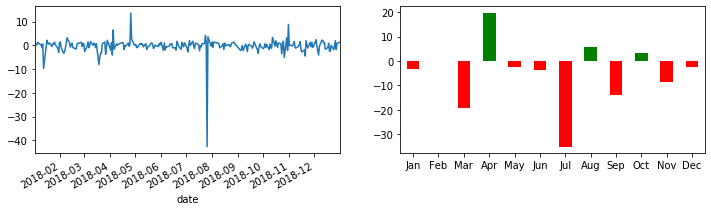

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12,3))

daily_change.plot(
    ax=axes[0]
)
net.index = net.index.strftime('%b')
net.plot(
    ax=axes[1],
    kind='bar',
    color = np.where(net >=0, 'g','r'),
    rot=0
)



In [24]:
net

Jan    -3.3500
Feb     0.0200
Mar   -19.3700
Apr    19.6247
May    -2.6488
Jun    -3.6246
Jul   -35.0750
Aug     5.5992
Sep   -14.0150
Oct     3.0950
Nov    -8.5100
Dec    -2.5200
Name: after_hours, dtype: float64

In [38]:
qu.parsed_place.value_counts()[:5]

Alaska         3665
California     2861
Nevada          681
Hawaii          367
Puerto Rico     216
Name: parsed_place, dtype: int64

In [55]:
eq =qu.assign(
    time = lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake = 1
)

In [56]:
eq.head()

,mag,magType,time,place,tsunami,parsed_place,earthquake
0,1.35,ml,2018-10-13 23:59:28.010,"9km NE of Aguanga, CA",0,California,1
1,1.29,ml,2018-10-13 23:58:49.610,"9km NE of Aguanga, CA",0,California,1
2,3.42,ml,2018-10-13 23:57:42.610,"8km NE of Aguanga, CA",0,California,1
3,0.44,ml,2018-10-13 23:56:18.070,"9km NE of Aguanga, CA",0,California,1
4,2.16,md,2018-10-13 23:51:56.050,"10km NW of Avenal, CA",0,California,1


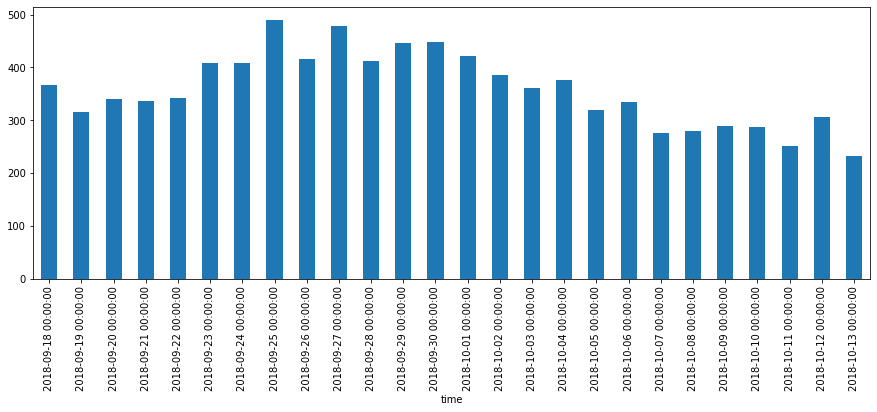

In [58]:
eq.set_index('time').resample('1D').earthquake.sum().plot(kind='bar', figsize=(15,5))

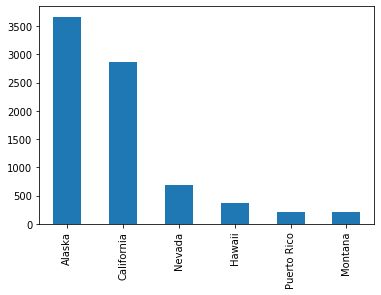

In [61]:
eq.parsed_place.value_counts()[:6:].plot(kind='bar')

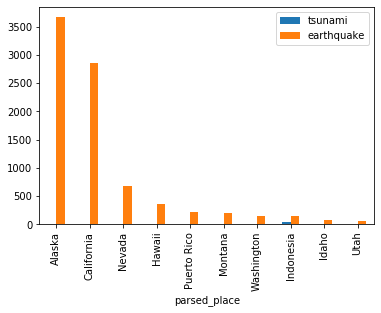

In [79]:
eq.loc[:,['parsed_place','tsunami','earthquake']].groupby('parsed_place').sum(
).sort_values(by=['earthquake','tsunami'], ascending=False
)[:10:].plot(kind='bar')


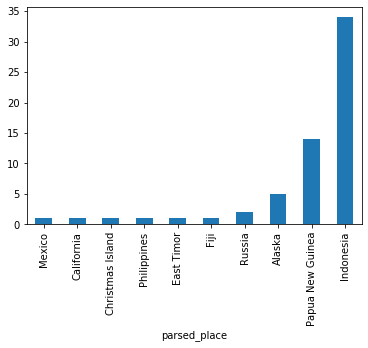

In [105]:
eq.groupby('parsed_place').tsunami.sum().sort_values()[-10::].plot(kind='bar')

In [118]:
eq.head()

,mag,magType,time,place,tsunami,parsed_place,earthquake
0,1.35,ml,2018-10-13 23:59:28.010,"9km NE of Aguanga, CA",0,California,1
1,1.29,ml,2018-10-13 23:58:49.610,"9km NE of Aguanga, CA",0,California,1
2,3.42,ml,2018-10-13 23:57:42.610,"8km NE of Aguanga, CA",0,California,1
3,0.44,ml,2018-10-13 23:56:18.070,"9km NE of Aguanga, CA",0,California,1
4,2.16,md,2018-10-13 23:51:56.050,"10km NW of Avenal, CA",0,California,1


In [135]:
indo = eq.query("parsed_place == 'Indonesia'").set_index('time').resample('D').sum()

In [136]:
indo.index = indo.index.strftime('%b\n%d')

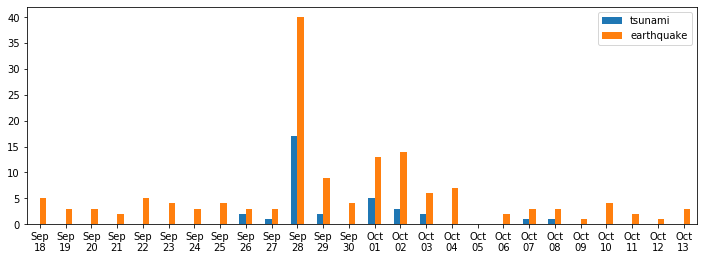

In [138]:
indo.loc[:,['tsunami', 'earthquake']].plot(kind='bar',figsize=(12,4),rot=0)

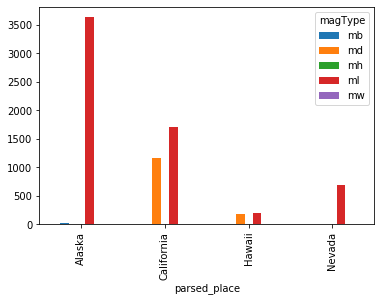

In [148]:
eq[eq.parsed_place.isin(['California','Alaska','Nevada','Hawaii'])].groupby(
['parsed_place','magType']
).mag.count().unstack().plot.bar()

In [150]:
pivot = eq.assign(
    mag_bin = lambda x: np.floor(x.mag)
).pivot_table(
    index='mag_bin', columns='magType', values='mag', aggfunc='count'
)

In [151]:
pivot

magType,mb,mb_lg,md,mh,ml,ms_20,mw,mwb,mwr,mww
mag_bin,,,,,,,,,,
-2.0,NaN,NaN,1.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN
-1.0,NaN,NaN,29.0,2.0,446.0,NaN,NaN,NaN,NaN,NaN
0.0,NaN,NaN,721.0,9.0,2072.0,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,700.0,1.0,3126.0,NaN,NaN,NaN,NaN,NaN
2.0,NaN,25.0,267.0,NaN,985.0,NaN,NaN,NaN,NaN,NaN
3.0,7.0,5.0,77.0,NaN,153.0,NaN,3.0,NaN,2.0,NaN
4.0,514.0,NaN,1.0,NaN,6.0,NaN,1.0,NaN,12.0,2.0
5.0,79.0,NaN,NaN,NaN,2.0,1.0,NaN,2.0,NaN,55.0
6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


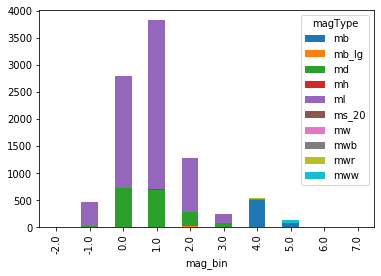

In [155]:
pivot.plot.bar(stacked=True)